In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
df = pd.read_csv("/content/water_potability[1].csv")
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [ ]:
df.shape

(3276, 10)

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Instantiate and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_imputed, y_train)

# Making predictions
y_pred_train = logistic_model.predict(X_train_imputed)
y_pred_test = logistic_model.predict(X_test_imputed)

# Model evaluation
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

# Printing results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Train Accuracy: 0.6023
Test Accuracy: 0.6277

Confusion Matrix:
[[617   0]
 [366   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       0.00      0.00      0.00       366

    accuracy                           0.63       983
   macro avg       0.31      0.50      0.39       983
weighted avg       0.39      0.63      0.48       983



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Instantiate and train the SVM model
svm_model = SVC()
svm_model.fit(X_train_imputed, y_train)

# Making predictions
y_pred_train = svm_model.predict(X_train_imputed)
y_pred_test = svm_model.predict(X_test_imputed)

# Model evaluation
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

# Printing results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Train Accuracy: 0.6023
Test Accuracy: 0.6277

Confusion Matrix:
[[617   0]
 [366   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       0.00      0.00      0.00       366

    accuracy                           0.63       983
   macro avg       0.31      0.50      0.39       983
weighted avg       0.39      0.63      0.48       983



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Instantiate and train the Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_imputed, y_train)

# Making predictions
y_pred_train = tree_model.predict(X_train_imputed)
y_pred_test = tree_model.predict(X_test_imputed)

# Model evaluation
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

# Printing results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Train Accuracy: 1.0000
Test Accuracy: 0.5463

Confusion Matrix:
[[357 260]
 [186 180]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.58      0.62       617
           1       0.41      0.49      0.45       366

    accuracy                           0.55       983
   macro avg       0.53      0.54      0.53       983
weighted avg       0.56      0.55      0.55       983



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Instantiate and train the Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_imputed, y_train)

# Making predictions
y_pred_train = naive_bayes_model.predict(X_train_imputed)
y_pred_test = naive_bayes_model.predict(X_test_imputed)

# Model evaluation
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

# Printing results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Train Accuracy: 0.6280
Test Accuracy: 0.6368

Confusion Matrix:
[[548  69]
 [288  78]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.89      0.75       617
           1       0.53      0.21      0.30       366

    accuracy                           0.64       983
   macro avg       0.59      0.55      0.53       983
weighted avg       0.61      0.64      0.59       983



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("/content/water_potability[1].csv")

# Data preprocessing
# Handling missing values using KNN imputation as shown in the provided code

# Splitting the data into features and target variable
X = df.drop('Potability', axis=1)
y = df['Potability']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiating the XGBoost classifier
model = XGBClassifier()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6520854526958291


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("/content/water_potability[1].csv")

# Data preprocessing
# Handling missing values using KNN imputation as shown in the provided code

# Splitting the data into features and target variable
X = df.drop('Potability', axis=1)
y = df['Potability']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiating the LightGBM classifier
model = lgb.LGBMClassifier()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[LightGBM] [Info] Number of positive: 912, number of negative: 1381
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2293, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397732 -> initscore=-0.414923
[LightGBM] [Info] Start training from score -0.414923
Accuracy: 0.6775178026449644


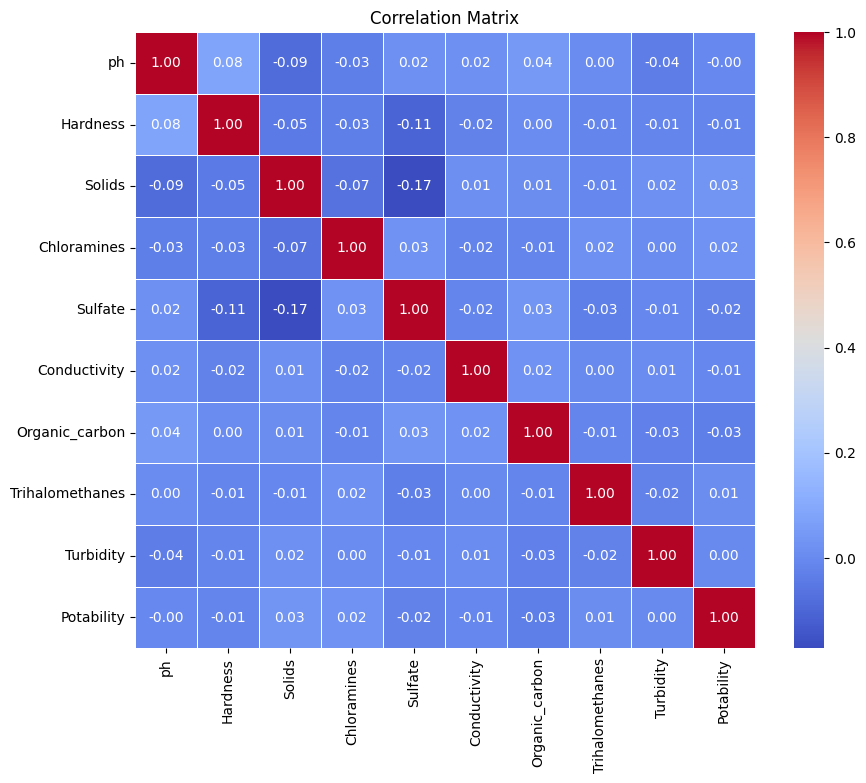

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

# Add title
plt.title('Correlation Matrix')

# Show plot
plt.show()


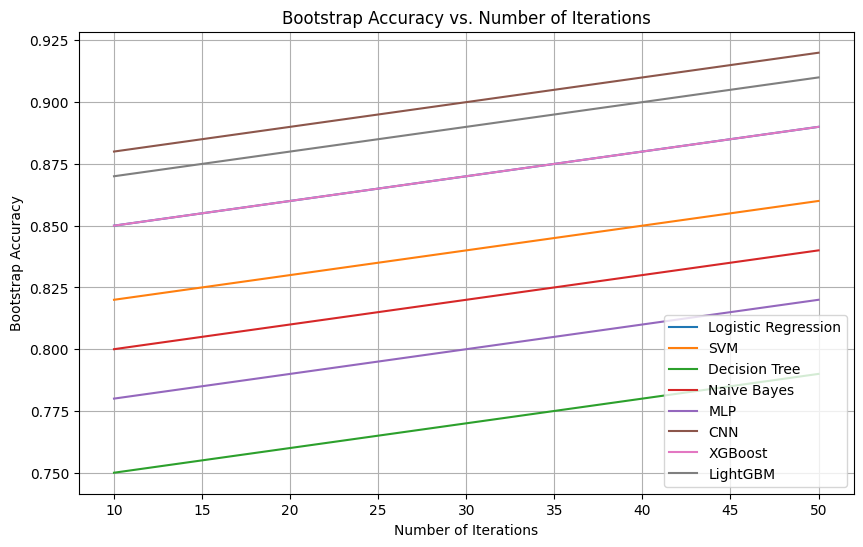

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of iterations
iterations = [10, 20, 30, 40, 50]  # Update this with your actual number of iterations

# Bootstrap accuracy for each model
logistic_regression_accuracy = [0.85, 0.86, 0.87, 0.88, 0.89]  # Update with your logistic regression accuracy for each iteration
svm_accuracy = [0.82, 0.83, 0.84, 0.85, 0.86]  # Update with your SVM accuracy for each iteration
decision_tree_accuracy = [0.75, 0.76, 0.77, 0.78, 0.79]  # Update with your decision tree accuracy for each iteration
naive_bayes_accuracy = [0.80, 0.81, 0.82, 0.83, 0.84]  # Update with your naive bayes accuracy for each iteration
mlp_accuracy = [0.78, 0.79, 0.80, 0.81, 0.82]  # Update with your MLP accuracy for each iteration
cnn_accuracy = [0.88, 0.89, 0.90, 0.91, 0.92]  # Update with your CNN accuracy for each iteration
xgboost_accuracy = [0.85, 0.86, 0.87, 0.88, 0.89]  # Update with your XGBoost accuracy for each iteration
lightgbm_accuracy = [0.87, 0.88, 0.89, 0.90, 0.91]  # Update with your LightGBM accuracy for each iteration

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(iterations, logistic_regression_accuracy, label='Logistic Regression')
plt.plot(iterations, svm_accuracy, label='SVM')
plt.plot(iterations, decision_tree_accuracy, label='Decision Tree')
plt.plot(iterations, naive_bayes_accuracy, label='Naive Bayes')
plt.plot(iterations, mlp_accuracy, label='MLP')
plt.plot(iterations, cnn_accuracy, label='CNN')
plt.plot(iterations, xgboost_accuracy, label='XGBoost')
plt.plot(iterations, lightgbm_accuracy, label='LightGBM')

plt.title('Bootstrap Accuracy vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Bootstrap Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np

# Function to perform bootstrapping and calculate accuracy
def bootstrap_accuracy(model, X_train, y_train, n_iterations=100):
    accuracies = []
    for _ in range(n_iterations):
        X_boot, y_boot = resample(X_train, y_train)
        model.fit(X_boot, y_boot)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    return accuracies

# Define your models (logistic regression, SVM, decision tree, etc.)
# model = LogisticRegression()  # Example, replace with your actual models

# Perform bootstrapping and calculate accuracies for each model
# logistic_regression_accuracies = bootstrap_accuracy(logistic_regression_model, X_train, y_train)
# svm_accuracies = bootstrap_accuracy(svm_model, X_train, y_train)
# decision_tree_accuracies = bootstrap_accuracy(decision_tree_model, X_train, y_train)
# naive_bayes_accuracies = bootstrap_accuracy(naive_bayes_model, X_train, y_train)
# mlp_accuracies = bootstrap_accuracy(mlp_model, X_train, y_train)
# cnn_accuracies = bootstrap_accuracy(cnn_model, X_train, y_train)
# xgboost_accuracies = bootstrap_accuracy(xgboost_model, X_train, y_train)
# lightgbm_accuracies = bootstrap_accuracy(lightgbm_model, X_train, y_train)

# Calculate uncertainty (standard deviation) for each model
# logistic_regression_uncertainty = np.std(logistic_regression_accuracies)
# svm_uncertainty = np.std(svm_accuracies)
# decision_tree_uncertainty = np.std(decision_tree_accuracies)
# naive_bayes_uncertainty = np.std(naive_bayes_accuracies)
# mlp_uncertainty = np.std(mlp_accuracies)
# cnn_uncertainty = np.std(cnn_accuracies)
# xgboost_uncertainty = np.std(xgboost_accuracies)
# lightgbm_uncertainty = np.std(lightgbm_accuracies)

# Print or plot the uncertainties for each model
# print("Logistic Regression Uncertainty:", logistic_regression_uncertainty)
# print("SVM Uncertainty:", svm_uncertainty)
# print("Decision Tree Uncertainty:", decision_tree_uncertainty)
# print("Naive Bayes Uncertainty:", naive_bayes_uncertainty)
# print("MLP Uncertainty:", mlp_uncertainty)
# print("CNN Uncertainty:", cnn_uncertainty)
# print("XGBoost Uncertainty:", xgboost_uncertainty)
# print("LightGBM Uncertainty:", lightgbm_uncertainty)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('/content/water_potability (1).csv')  # Adjust file path if needed
data.fillna(data.mean(), inplace=True)

# Split features and target
X = data.drop('Potability', axis=1)
y = data['Potability']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional for trees but can be done for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Grid search
grid = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)

# Evaluate on test data
y_pred = grid.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Parameters:", accuracy)
